# Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

# Variance-Covariance Method

The Variance-covariance is a parametric method which assumes that the returns are normally distributed. Similar to the historical method, we use the historical data to calculate parameters such as standard deviation and mean. Based on these parameters, we plot a normal curve against the daily returns. From the normal curve, we get the VaR for different confidence levels. Mathematically, for a 95% confidence level, VaR has calculated as Mean - 1.65 * standard deviations and for 99% confidence level, VaR is calculated as Mean - 2.33 * standard deviation.

## Import the libraries
Let us import the necessary libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import scipy
# Plotting 
import matplotlib.pyplot as plt

# Statistical calculation
from scipy.stats import norm

# Tabular data output
from tabulate import tabulate 

## Import the data

Here we do the following two steps:
1. Import the price data for Apple Inc.
2. Calculate the daily returns

In [2]:
df = pd.read_csv('../data_modules/AAPL_new.csv')
df = df.set_index("Date")
df['returns'] = df.Close.pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2015-12-31,107.01,107.03,104.82,105.26,99.03,40635300,NaN
2016-01-04,102.61,105.37,102.00,105.35,99.12,67649400,0.000855
2016-01-05,105.75,105.85,102.41,102.71,96.63,55791000,-0.025059
2016-01-06,100.56,102.37,99.87,100.70,94.74,68457400,-0.019570
2016-01-07,98.68,100.13,96.43,96.45,90.74,81094400,-0.042205


## Calculate the VaR

We do the following tasks:
1. Determine mean of the daily returns
2. Determine standard deviation of the daily returns
3. Plot the normal curve against the daily returns
3. Calculate VaR using point percentile function (ppf)

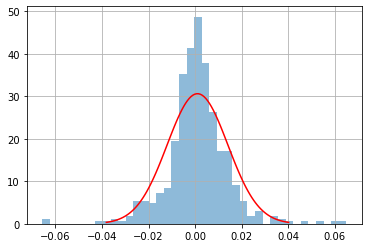

In [3]:
mean = np.mean(df['returns'])
std_dev = np.std(df['returns'])

df['returns'].hist(bins=40, density=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev), "r")
plt.show()

In [4]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)*100
VaR_95 = norm.ppf(1-0.95, mean, std_dev)*100
VaR_99 = norm.ppf(1-0.99, mean, std_dev)*100

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]],
               headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                        -1.5683
95%                        -2.04208
99%                        -2.9308


The daily VaR of the Apple Inc. stock at 90%, 95%, and 99% confidence levels are -1.56%, -2.04% and -2.93% respectively.

## Variance-Covariance Method for a portfolio VaR

Similar, to single stock VaR, we can calculate the portfolio VaR using the following steps:
1. Read the close price data of all the stocks in a portfolio and store it into a data frame
2. Calculate the daily returns of all the stock in the portfolio
3. Add all the stock returns to compute portfolio returns. Here we have assumed equal allocation to all the stocks in the portfolio
4. Calculate parameters such as standard deviation and mean
5. Based on these parameters, we plot a normal curve against the daily returns 
6. From the normal curve, we get the VaR for the different confidence levels

## Import the portfolio data

We define a portfolio with the following stocks namely Google, Tesla, IBM, Apple, Alibaba, Goldman Sachs, and Bank of America.
Then, we read the close price data for all the stocks in the portfolio and calculate the portfolio daily returns.

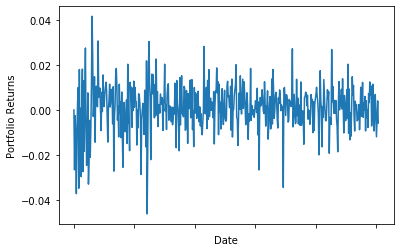

In [5]:
portfolio = pd.read_csv('../data_modules/closeprice.csv')
portfolio.set_index('Date', inplace=True)
portfolio = portfolio.pct_change()
portfolio['returns'] = portfolio.sum(axis=1)/7
portfolio['returns'].plot()
plt.ylabel("Portfolio Returns")
plt.show()

## Calculate the portfolio VaR
We calculate the portfolio VaR in the same way as we did for a single stock.

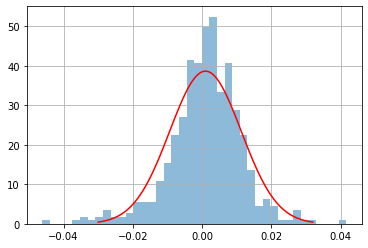

In [6]:
mean = np.mean(portfolio['returns'])
std_dev = np.std(portfolio['returns'])

portfolio['returns'].hist(bins=40, density=True,
                          histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev), "r")
plt.show()

In [7]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)*100
VaR_95 = norm.ppf(1-0.95, mean, std_dev)*100
VaR_99 = norm.ppf(1-0.99, mean, std_dev)*100

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]],
               headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                        -1.22648
95%                        -1.60176
99%                        -2.30574


The daily portfolio VaR at 90%, 95%, and 99% confidence levels are -1.22%, -1.60% and -2.30% respectively.
In the next unit, there will be Monte Carlo Simulation implementation in the Jupyter notebook. <br><br>